In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ================= CARGA DE DATOS =================
acc_ult = pd.read_csv("Accesos_Ultimo_Trim.csv", sep=";", decimal=",")
conx_per = pd.read_csv("Conexiones_Periodos.csv", sep=";", decimal=",")
conx_prov = pd.read_csv("Conexiones_Provincias.csv", sep=";", decimal=",")
localidades = pd.read_csv("Localidades.csv", sep=";", decimal=",")
periodos = pd.read_csv("Periodos.csv", sep=";", decimal=",")
provincias = pd.read_csv("Provincias.csv", sep=";", decimal=",")
rangos = pd.read_csv("Rangos.csv", sep=";", decimal=",")
tecnologias = pd.read_csv("Tecnologias.csv", sep=";", decimal=",")
vel_loc = pd.read_csv("Velocidades_Loc.csv", sep=";", decimal=",")
vel_prov = pd.read_csv("Velocidades_Prov.csv", sep=";", decimal=",")


Gráfico 1 – Accesos por tecnología (último trimestre, país)

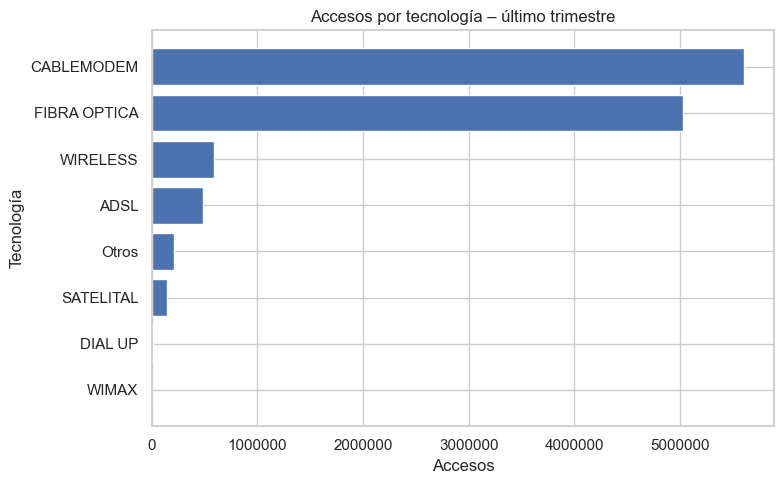

In [5]:
# Merge para traer el nombre de la tecnología
acc_tec = (
    acc_ult.merge(tecnologias, on="ID_Tecnologia")
           .groupby("ID_Tecnologia", as_index=False)["Accesos"]
           .sum()
           .sort_values("Accesos", ascending=True)   #  ORDENAR DESCENDENTE
)

plt.figure(figsize=(8,5))
plt.barh(acc_tec["ID_Tecnologia"], acc_tec["Accesos"])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Accesos por tecnología – último trimestre")
plt.xlabel("Accesos")
plt.ylabel("Tecnología")
plt.tight_layout()
plt.show()


Gráfico 2 – Top 10 provincias por accesos totales (último período)

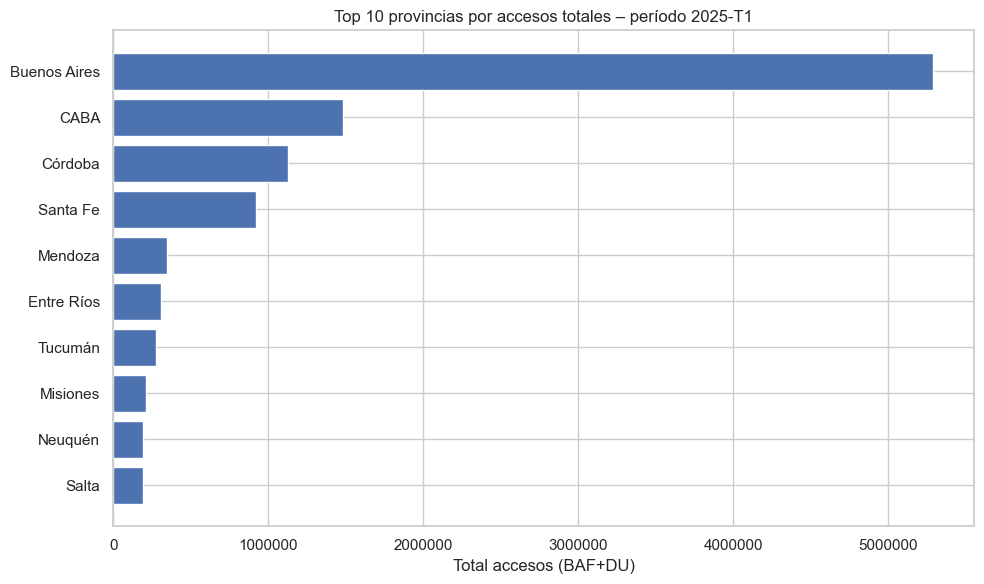

In [7]:
# Determinar último periodo por Año y Trimestre
per_orden = periodos.sort_values(["Año", "Trimestre"])
ultimo_id_periodo = per_orden["ID_Periodo"].iloc[-1]

top_prov = (
    conx_prov[conx_prov["ID_Periodo"] == ultimo_id_periodo]
    .groupby("ID_Provincia", as_index=False)["Total(BAF+DU)"]
    .sum()
    .sort_values("Total(BAF+DU)", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(top_prov["ID_Provincia"], top_prov["Total(BAF+DU)"])
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x')
plt.title(f"Top 10 provincias por accesos totales – período {ultimo_id_periodo}")
plt.xlabel("Total accesos (BAF+DU)")
plt.tight_layout()
plt.show()


Gráfico 3 – Distribución de accesos por rango de velocidad (último período, provincias)

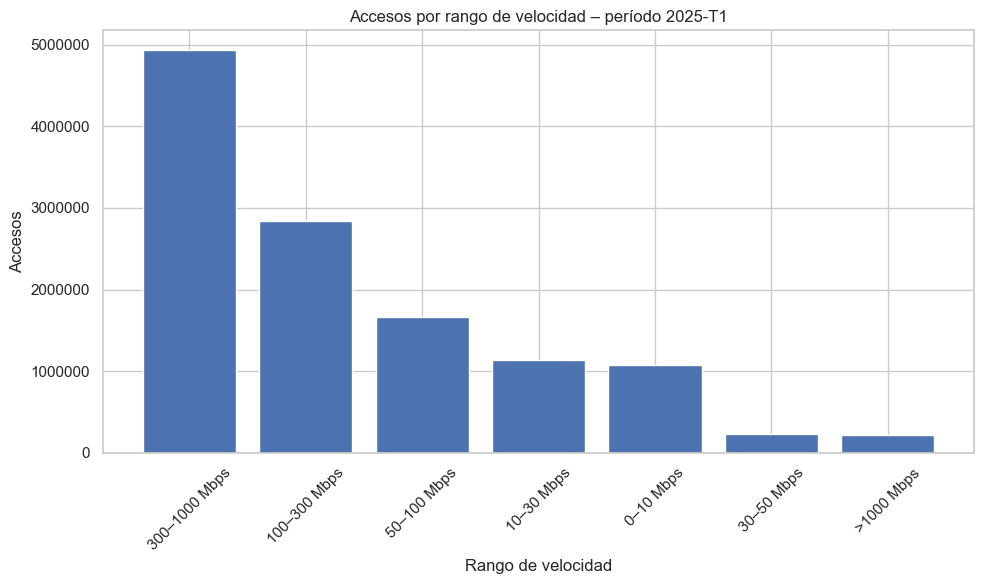

In [9]:
# Usamos ID_Rango_Velocidad + Rangos para etiqueta
vel_prov_ult = vel_prov[vel_prov["ID_Periodo"] == ultimo_id_periodo]

acc_rango = (
    vel_prov_ult.merge(rangos, on="ID_Rango_Velocidad")
                .groupby("ID_Rango_Velocidad", as_index=False)["Accesos"]
                .sum()
                .sort_values("Accesos", ascending=False)
)

plt.figure(figsize=(10,6))
plt.bar(acc_rango["ID_Rango_Velocidad"], acc_rango["Accesos"])
plt.ticklabel_format(style='plain', axis='y')
plt.title(f"Accesos por rango de velocidad – período {ultimo_id_periodo}")
plt.xlabel("Rango de velocidad")
plt.ylabel("Accesos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Gráfico 4 – Top 10 partidos con más accesos (en millones)

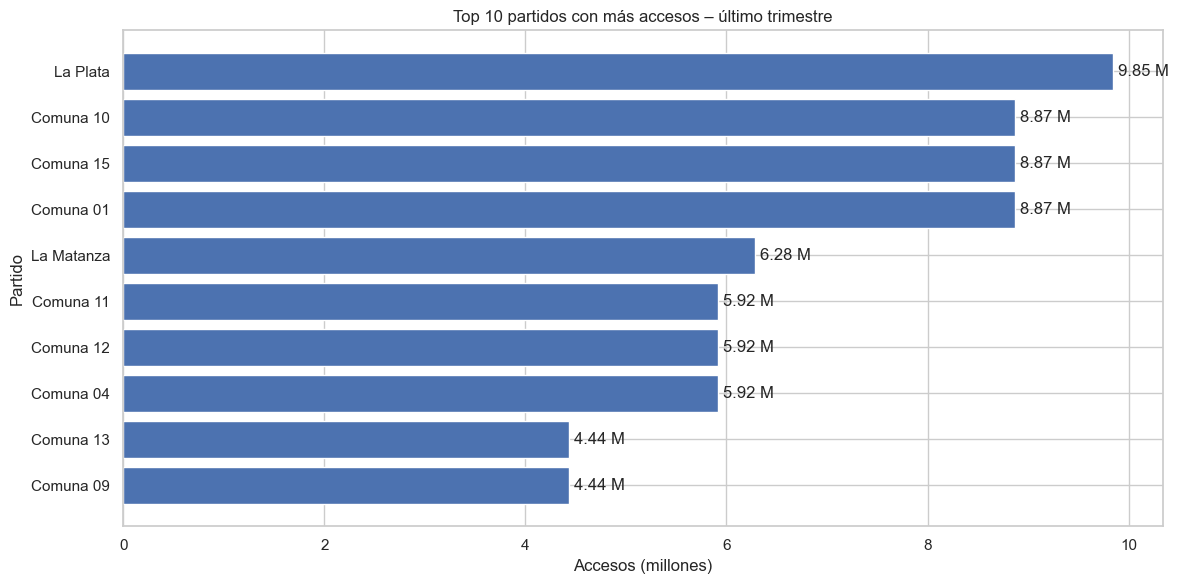

In [16]:
import matplotlib.pyplot as plt

# 1) Accesos totales por localidad (por si hay varias filas por tecnología)
acc_por_loc = (
    acc_ult.groupby("ID_Localidad", as_index=False)["Accesos"]
           .sum()
)

# 2) Unimos para traer Partido y Localidad
df_loc = acc_por_loc.merge(localidades, on="ID_Localidad")

# 3) Opcional: excluir Ciudad Autónoma de Buenos Aires como "partido" si aparece así
df_loc = df_loc[~df_loc["Partido"].str.upper().eq("CIUDAD AUTÓNOMA DE BUENOS AIRES")]

# 4) Accesos totales por Partido
acc_por_partido = (
    df_loc.groupby("Partido", as_index=False)["Accesos"]
          .sum()
          .sort_values("Accesos", ascending=False)
          .head(10)   # 🔟 Top 10 partidos
)

# 5) Pasar accesos a millones
acc_por_partido["Accesos_Millones"] = acc_por_partido["Accesos"] / 1_000_000

# 6) Gráfico
plt.figure(figsize=(12,6))
bars = plt.barh(acc_por_partido["Partido"], acc_por_partido["Accesos_Millones"])

# Mayor arriba
plt.gca().invert_yaxis()

# Sin notación científica en el eje X
plt.ticklabel_format(style="plain", axis="x")

# Etiquetas con valores en millones
for bar, value in zip(bars, acc_por_partido["Accesos_Millones"]):
    plt.text(
        value + 0.05,
        bar.get_y() + bar.get_height()/2,
        f"{value:.2f} M",
        va="center"
    )

plt.title("Top 10 partidos con más accesos – último trimestre")
plt.xlabel("Accesos (millones)")
plt.ylabel("Partido")
plt.tight_layout()
plt.show()


Gráfico 5 – Boxplot de accesos por provincia (todos los períodos)

<Figure size 1200x600 with 0 Axes>

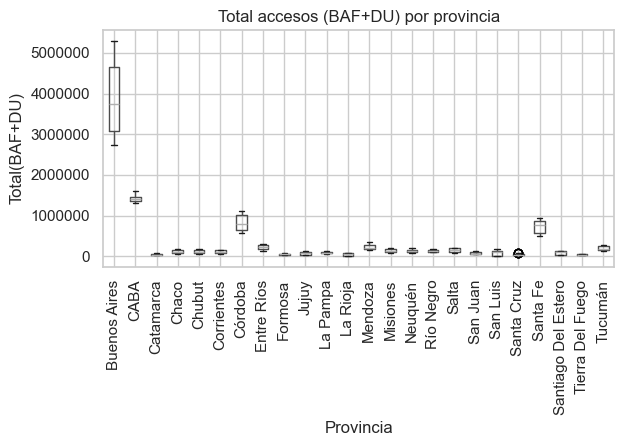

<Figure size 1400x600 with 0 Axes>

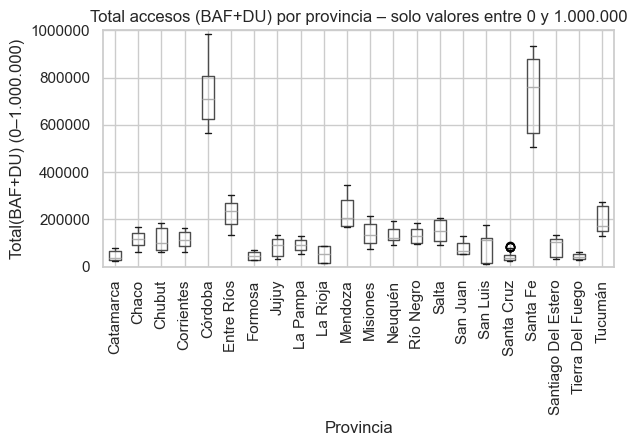

In [ ]:
plt.figure(figsize=(12,6))
conx_prov.boxplot(column="Total(BAF+DU)", by="ID_Provincia", rot=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Total accesos (BAF+DU) por provincia")
plt.suptitle("")  # saca el título automático de pandas
plt.xlabel("Provincia")
plt.ylabel("Total(BAF+DU)")
plt.tight_layout()
plt.show()

# --- FILTRO SOLO PARA VISUALIZACIÓN ---
df_filtrado = conx_prov[conx_prov["Total(BAF+DU)"] <= 1_000_000]

plt.figure(figsize=(14,6))
df_filtrado.boxplot(column="Total(BAF+DU)", by="ID_Provincia", rot=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Total accesos (BAF+DU) por provincia – solo valores entre 0 y 1.000.000")
plt.suptitle("")
plt.xlabel("Provincia")
plt.ylabel("Total(BAF+DU) (0–1.000.000)")
plt.ylim(0, 1_000_000)   #  asegura los límites del eje Y
plt.tight_layout()
plt.show()



Gráfico 6 – Evolución de accesos totales en el tiempo (nivel país)

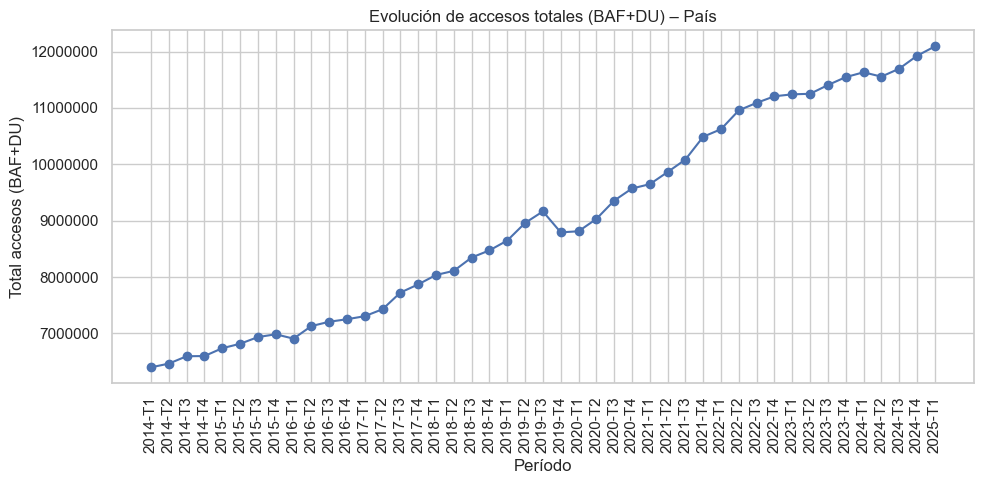

In [24]:
# Unimos con Periodos para usar Año y Trimestre
conx_per_t = conx_per.merge(periodos, on="ID_Periodo")

# Orden cronológico
conx_per_t = conx_per_t.sort_values(["Año", "Trimestre"])

plt.figure(figsize=(10,5))
plt.plot(
    conx_per_t["ID_Periodo"],
    conx_per_t["Total(BAF+DU)"],
    marker="o"
)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Evolución de accesos totales (BAF+DU) – País")
plt.xlabel("Período")
plt.ylabel("Total accesos (BAF+DU)")
plt.tight_layout()
plt.show()


Gráfico 7 – Histograma de totales (Conexiones_Periodos)

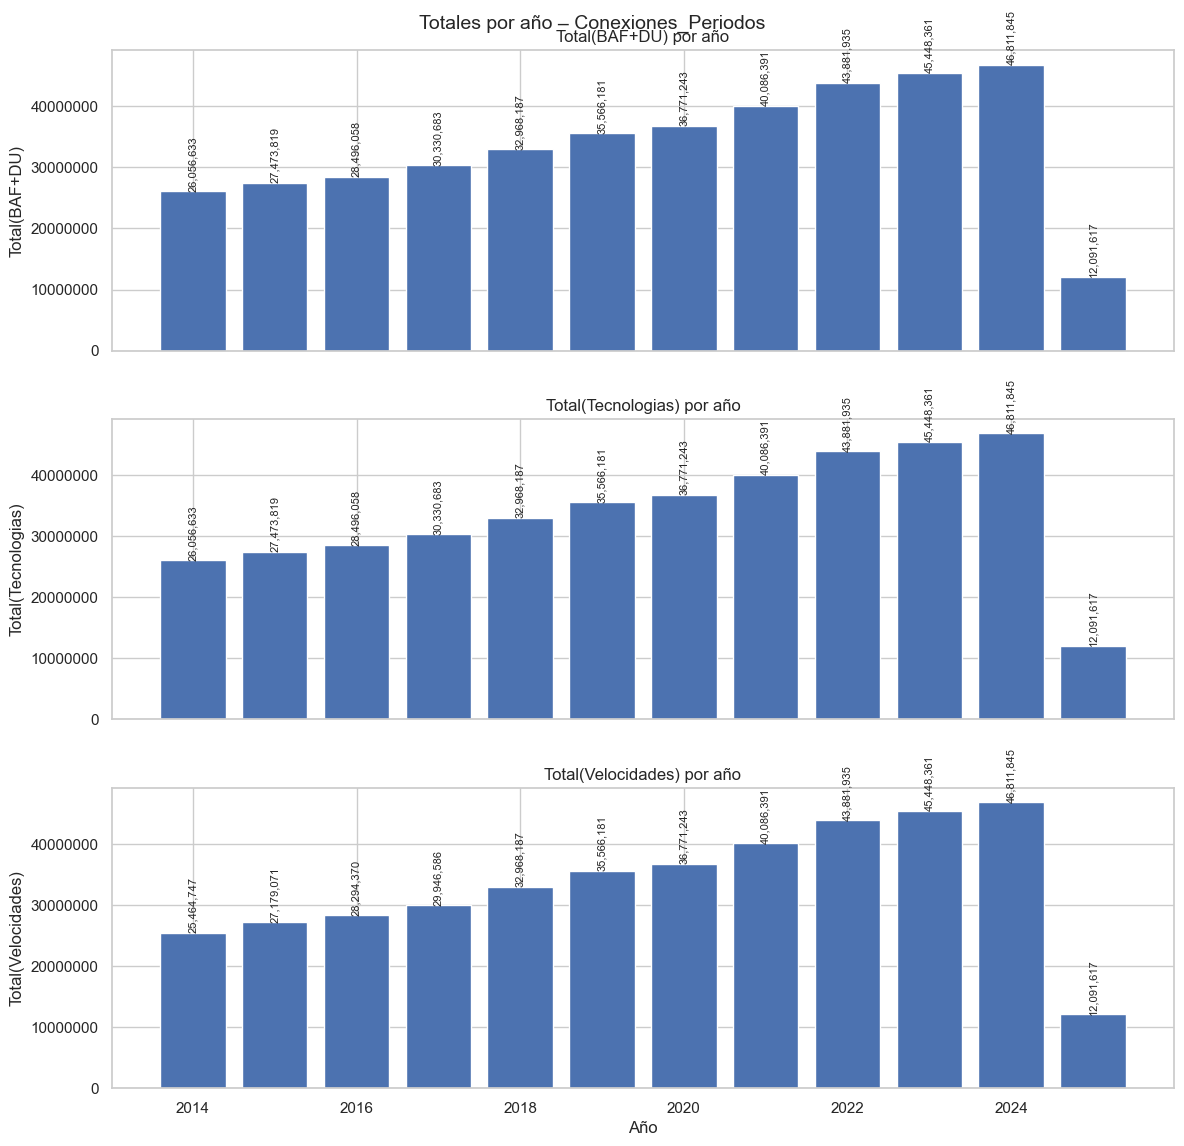

In [38]:
import matplotlib.pyplot as plt

# --- columnas de totales que queremos analizar ---
cols_totales = [
    "Total(BAF+DU)",
    "Total(Tecnologias)",
    "Total(Velocidades)"
]

# --- unimos con Periodos para traer el Año ---
conx_per_ano = conx_per.merge(periodos, on="ID_Periodo")

# --- agregamos por año (sumando los totales de todos los trimestres de ese año) ---
totales_por_ano = (
    conx_per_ano
    .groupby("Año", as_index=False)[cols_totales]
    .sum()
    .sort_values("Año")
)

# --- gráfico: un subplot por cada total ---
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

for i, col in enumerate(cols_totales):
    ax = axes[i]

    ax.bar(totales_por_ano["Año"], totales_por_ano[col])

    ax.set_title(f"{col} por año")
    ax.set_ylabel(col)

    # evitar notación científica en el eje Y
    ax.ticklabel_format(style="plain", axis="y")

    # mostrar valores en cada barra (opcional)
    for x, y in zip(totales_por_ano["Año"], totales_por_ano[col]):
        ax.text(x, y, f"{y:,.0f}", ha="center", va="bottom", fontsize=8, rotation=90)

axes[-1].set_xlabel("Año")

plt.suptitle("Totales por año – Conexiones_Periodos", fontsize=14, y=0.95)
plt.tight_layout()
plt.show()



Gráfico 8 – Heatmap de correlaciones entre velocidades (Conexiones_Periodos)

Columnas detectadas como velocidades:
['Hasta 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros(Velocidades)', 'Total(Velocidades)']


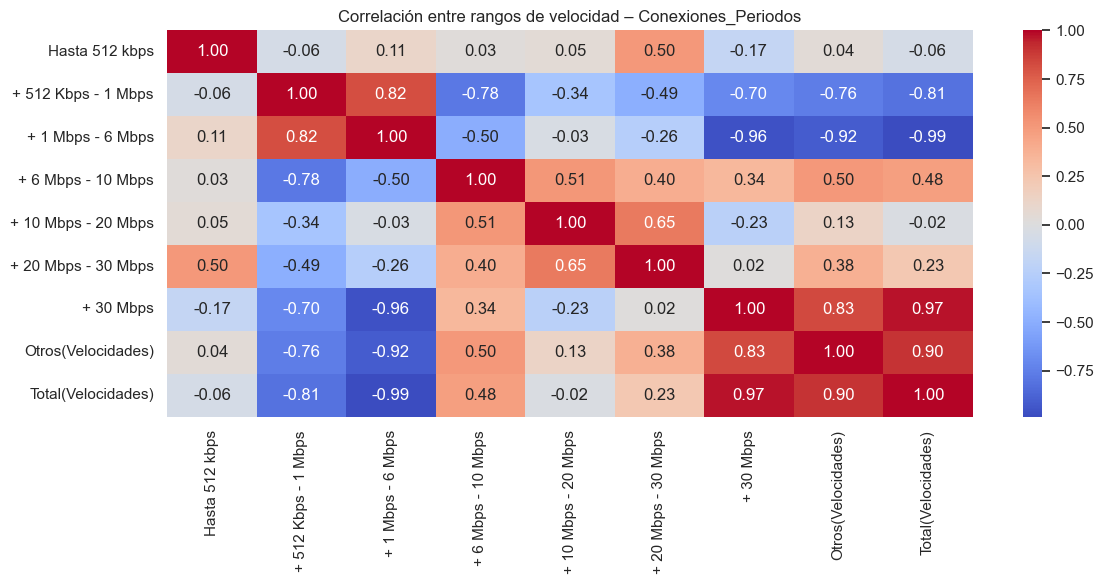

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- detectar columnas de velocidades ---
vel_cols = [col for col in conx_per.columns 
            if ("bps" in col.lower()) or ("mbps" in col.lower()) or ("veloc" in col.lower())]

print("Columnas detectadas como velocidades:")
print(vel_cols)

# --- dataframe solo con columnas de velocidades ---
df_vel = conx_per[vel_cols]

# --- calcular matriz de correlación ---
corr = df_vel.corr()

# --- gráfico heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlación entre rangos de velocidad – Conexiones_Periodos")
plt.tight_layout()
plt.show()



Gráfico 9 – Suma de registros por provincia (Conexiones_Provincias)

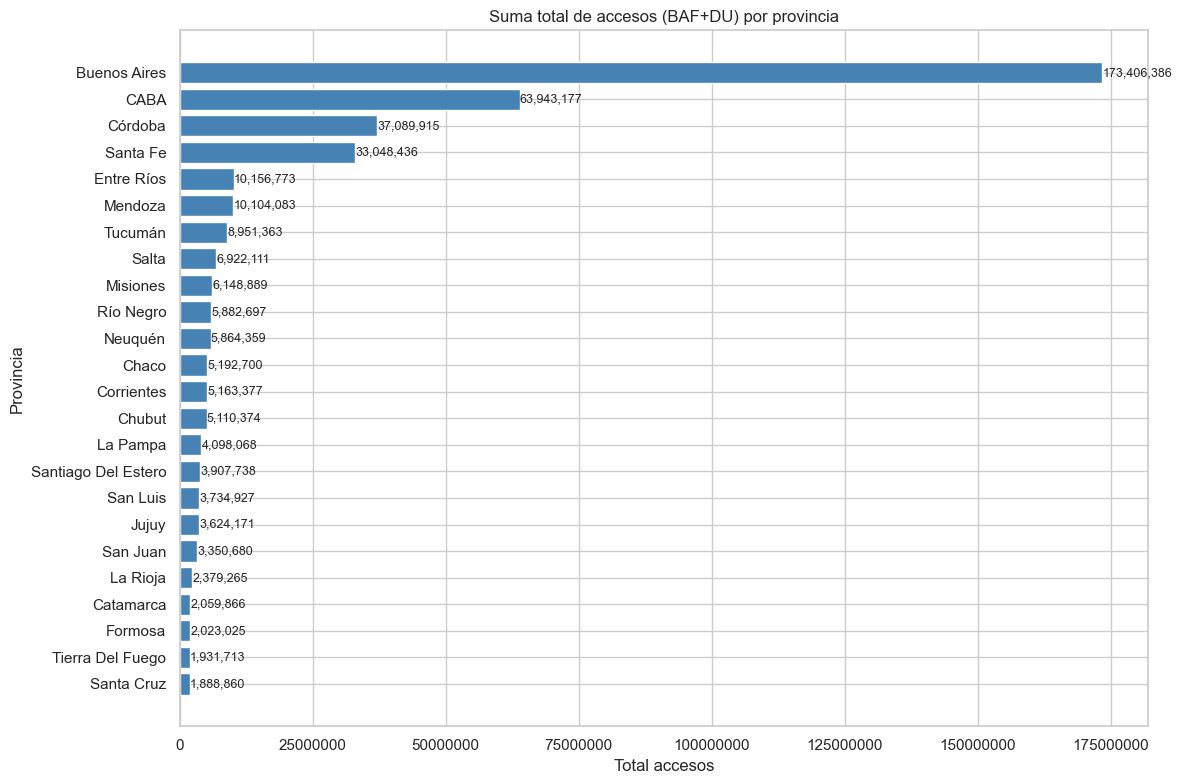

In [40]:
# Gráfico 9 – Suma de Total(BAF+DU) por provincia (orden descendente)

# Agrupación
prov_totales = (
    conx_prov.groupby("ID_Provincia", as_index=False)["Total(BAF+DU)"]
             .sum()
             .sort_values("Total(BAF+DU)", ascending=False)
)

plt.figure(figsize=(12,8))
bars = plt.barh(prov_totales["ID_Provincia"], prov_totales["Total(BAF+DU)"], color="steelblue")

# Mayor arriba
plt.gca().invert_yaxis()

# Sin notación científica
plt.ticklabel_format(style="plain", axis="x")

# Etiquetas con los valores
for bar, value in zip(bars, prov_totales["Total(BAF+DU)"]):
    plt.text(
        value + 50000,   # separa un poco la etiqueta del final de la barra
        bar.get_y() + bar.get_height()/2,
        f"{value:,.0f}",
        va="center",
        fontsize=9
    )

plt.title("Suma total de accesos (BAF+DU) por provincia")
plt.xlabel("Total accesos")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()



Gráfico 10 – Velocidad media por provincia (último período)

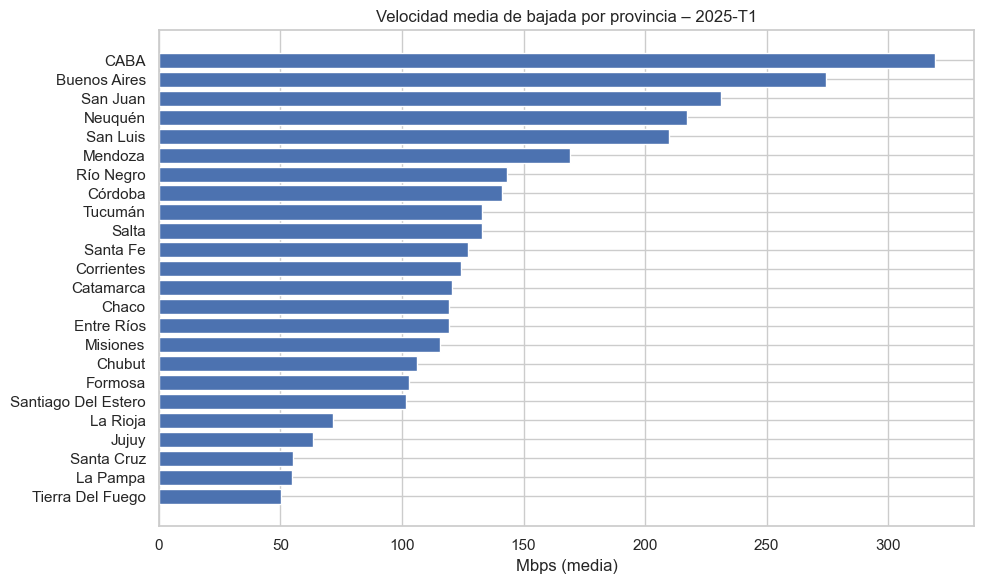

In [36]:
if "Mbps (Media de bajada)" in conx_prov.columns:
    vel_med = (
        conx_prov[conx_prov["ID_Periodo"] == ultimo_id_periodo]
        .groupby("ID_Provincia", as_index=False)["Mbps (Media de bajada)"]
        .mean()
        .sort_values("Mbps (Media de bajada)", ascending=False)
    )

    plt.figure(figsize=(10,6))
    plt.barh(vel_med["ID_Provincia"], vel_med["Mbps (Media de bajada)"])
    plt.gca().invert_yaxis()
    plt.title(f"Velocidad media de bajada por provincia – {ultimo_id_periodo}")
    plt.xlabel("Mbps (media)")
    plt.tight_layout()
    plt.show()
